## IMPORTAÇÃO DE COTAÇÕES DE VALE E GERDAU E CÁLCULO DE RETORNOS 
Este script é a realização de exercício proposto no livro "Python e Mercado Financeiro", de Marco Antônio Leonel, 
no qual se exigiu que fossem criados quatro gráficos, nos quais se mostrariam dados de cotações de Vale e Gerdau, 
bem como os retornos respectivos. O período analisado é de 01/09/2019 a 01/10/2019.
Os dados foram importados do Yahoo Finance. 

### BIBLIOTECAS

In [4]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as ny
import matplotlib.pyplot as fig

### IMPORTANDO DADOS

In [2]:
yf.pdr_override() 
vale3 = "VALE3.SA"
gerdau3 = "GGBR4.SA"
vale = pdr.get_data_yahoo(vale3, start = "2019-09-01", end = "2019-10-01")
gerdau = pdr.get_data_yahoo(gerdau3, start="2019-09-01", end="2019-10-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### TRANSFORMANDO DADOS

In [3]:
# Pegando preços de fechamento das ações e retirando o índex do Data Frame para facilitação de etapas posteriores
vale_dados = (vale
  .reset_index()
   ['Close']) 
gerdau_dados = (
    gerdau
    .reset_index()
    ['Close']
)

# Transformando dados em array, formato necessário para o cálculo dos retornos 
vale_dados = ny.array(vale_dados)
gerdau_dados = ny.array(gerdau_dados)

# Calculando retornos - Utilizou-se método mais complexo, no entanto poderia ter sido utilizada a função pct_change, do pandas
retorno_vale = ((vale_dados[1:len(vale_dados)]-vale_dados[0:len(vale_dados)-1])/vale_dados[0:len(vale_dados)-1])*100
retorno_gerdau = ((gerdau_dados[1:len(gerdau_dados)]-gerdau_dados[0:len(gerdau_dados)-1])/gerdau_dados[0:len(gerdau_dados)-1])*100

### GRÁFICOS

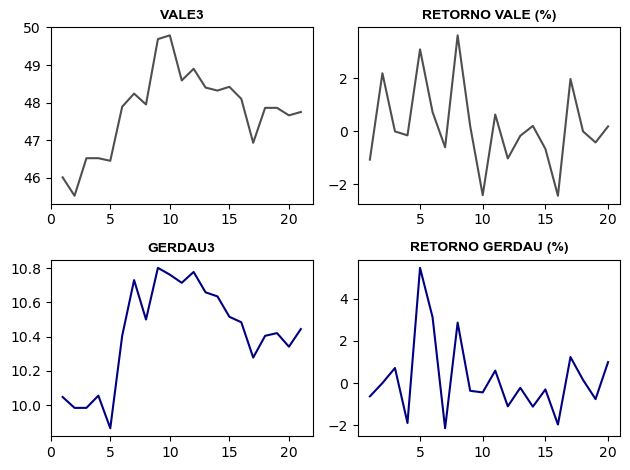

In [7]:
eixo_x = ny.arange(1,len(vale_dados)+1, dtype= int) # Eixo x dos gráficos das cotações
eixo_x2 = ny.arange(1,21) # Eixo x dos gráficos dos retornos dos ativos

fig.subplot(221)
fig.plot(eixo_x, vale_dados, color = '#4F4F4F')
fig.title('VALE3', size = 10, fontweight = 'bold', fontname = "Arial")

fig.subplot(222)
fig.plot(eixo_x2, retorno_vale, color = '#4F4F4F')
fig.title('RETORNO VALE (%)', fontname = 'Arial', fontweight = 'bold', size = 10)

fig.subplot(223)
fig.plot(eixo_x, gerdau_dados, color = '#000080')
fig.title('GERDAU3', size = 10, fontweight = 'bold', fontname="Arial")

fig.subplot(224)
fig.plot(eixo_x2, retorno_gerdau, color = '#000080')
fig.title('RETORNO GERDAU (%)', fontname = 'Arial', fontweight = 'bold', size = 10)


fig.tight_layout()

Conforme demonstram os gráficos acima, as cotações de Vale e Gerdau moveram-se de forma bem próxima, indicando que podem haver fatores comuns que impactam ambos os ativos. No entanto, tal conclusão é superficial e se dá apenas com base na observação dos gráficos. Para conclusões mais robustas, torna-se necessária uma análise da correlação entre as ações. 
No que diz respeito aos retornos, não há indícios, pela observação dos gráficos, de que haja correlação entre retornos da Vale e da Gerdau. Ademais, não parecem ser normalmente distribuídos. No entanto, o que os assemelha é a alta volatilidade. Porém, como já foi indicado, conclusões mais robustas só podem ser tomadas a partir de análise detalhada de outros elementos, utilizando-se outras ferramentas e bibliotecas. Este script volta-se, precipuamente, a dar uma pincelada introdutória ao uso do Python no Mercado Financeiro. 